<a href="https://colab.research.google.com/github/manassanant132/Time_Series/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

Ct0 = np.array([[2],[3]])

Wt0 = np.array([[0],[0.5]])

Ct = Ct0 * Wt0
print(Ct)

[[0. ]
 [1.5]]


In [ ]:
It = np.array([[0],[.2]])
Ct = Ct+It
Ct

array([[0. ],
       [1.7]])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'

In [ ]:
df = pd.read_csv(path,usecols=['Sales'])

In [ ]:
df.head()

,Sales
0,6550
1,8728
2,12026
3,14395
4,14587


In [ ]:
df.isnull().sum()

Sales    0
dtype: int64

In [ ]:
df. shape

(108, 1)

In [ ]:
df

,Sales
0,6550
1,8728
2,12026
3,14395
4,14587
...,...
103,16722
104,14385
105,21342
106,17180


In [ ]:
n_train = int(df.shape[0]**0.8)
n_train

608

<function matplotlib.pyplot.show(close=None, block=None)>

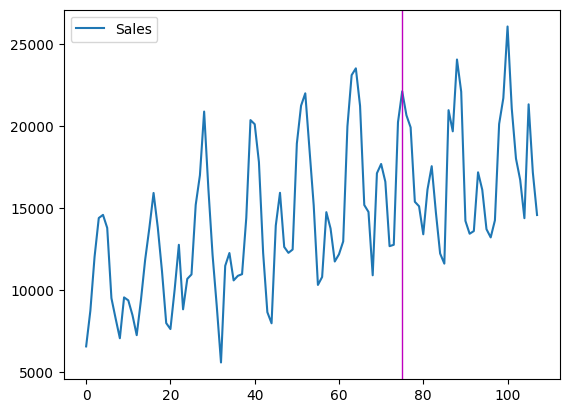

In [ ]:
df.plot()
plt.axvline(n_train,c='m',lw=1.0)
plt.show

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:5]

array([[0.04783011],
       [0.15391359],
       [0.31454873],
       [0.42993522],
       [0.43928693]])

In [ ]:
def convertToMatrix(data,step=1):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

In [ ]:
train,test =data_sc[0:n_train],data_sc[n_train:]
train.shape,test.shape

((75, 1), (33, 1))

In [ ]:
step=1

X_train,y_train = convertToMatrix(train,step)
X_test,y_test = convertToMatrix(test,step)

print('Train test (after conversation):',X_train.shape,X_test.shape)

Train test (after conversation): (74, 1, 1) (32, 1, 1)


In [ ]:
y_train.shape ,y_test.shape

((74, 1), (32, 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=32,input_shape=(step,1),activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4385 (17.13 KB)
Trainable params: 4385 (17.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=1,verbose=0)

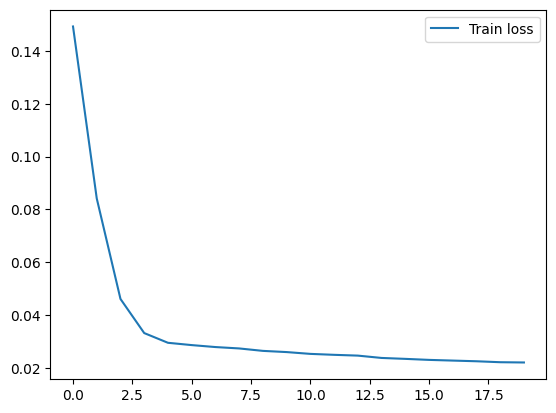

In [ ]:
plt.plot(history.history['loss'],label='Train loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print(score)

0.027824757620692253


In [ ]:
trainPredict = model.predict(X_train)

3/3 [==============================] - 0s 4ms/step


In [ ]:
testPredict = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
trainPredict_inv = sc.inverse_transform(trainPredict)
testPredict_inv = sc.inverse_transform(testPredict)
y_train_inv = sc.inverse_transform(y_train)
y_test_inv = sc.inverse_transform(y_test)

r2_train = r2_score(y_train_inv,trainPredict_inv)
r2_test = r2_score(y_test_inv,testPredict_inv)

rmse_train = np.sqrt(mean_squared_error(y_train_inv,trainPredict_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print("R2 Train: {:.3f}".format(r2_train))
print("R2 Test: {:.3f}".format(r2_test))

print('RMSE Train: {:.3f}'.format(rmse_train))
print('RMSE Test: {:.3f}'.format(rmse_test))

1/1 [==============================] - 0s 42ms/step
R2 Train: 0.494
R2 Test: 0.122
RMSE Train: 3017.316
RMSE Test: 3424.726


In [ ]:
prefix = np.empty(step).reshape(-1,1)
prefix.fill(np.nan)

trainPredict_inv = np.concatenate((prefix,trainPredict_inv),axis=0)
testPredict_inv = np.concatenate((prefix,testPredict_inv),axis=0)

predict_inv = np.concatenate((trainPredict_inv,testPredict_inv),axis=0)

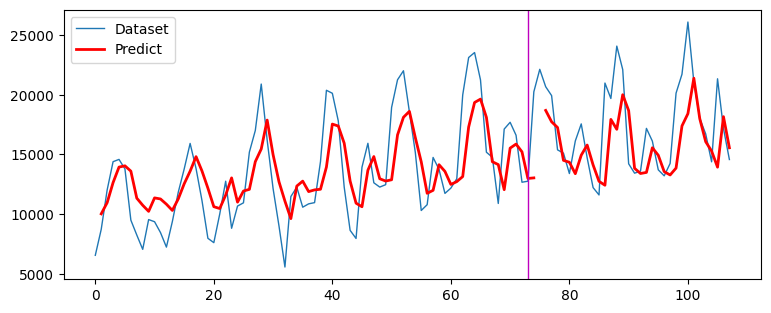

In [ ]:
plt.figure(figsize=(9,3.5))
plt.plot(df.values,lw=1.0,label='Dataset')
plt.plot(predict_inv,'r',lw=2.0,label='Predict')
plt.axvline(n_train-step-1,c='m',lw=1.0)
plt.legend()
plt.show()

In [ ]:
X_input= X_train[-step:]

pred = model.predict(X_input)
pred_inv = sc.inverse_transform(pred)

print('Prediction:',pred_inv[-1][-1])

1/1 [==============================] - 0s 36ms/step
Prediction: 13037.617


In [ ]:
end =X_train.shape[0]+1
n_back=6
avg_cal=df[end-n_back-1:end-1].sum()/df[end-n_back-1:end-1].count()

In [ ]:
avg_cal=avg_cal.values[0]
print('Estimate the Average:',avg_cal.round(2))

Estimate the Average: 14627.83


In [ ]:
y_true = y_train[-1].reshape(-1,1)
y_true = sc.inverse_transform(y_true)
y_true = np.squeeze(y_test)
print('Actual:',y_true)

Actual: [0.73591155 0.69967366 0.47830111 0.46490673 0.38152063 0.51468511
 0.58418976 0.44576494 0.32424139 0.29418927 0.75091325 0.68793532
 0.90170961 0.80590327 0.42141152 0.38312795 0.39111587 0.5659247
 0.5139058  0.39671716 0.37221762 0.42292144 0.70970727 0.78695631
 1.         0.75573523 0.60669232 0.54327602 0.42944815 0.76830159
 0.56558375 0.43879986]


ValueError: x and y must be the same size

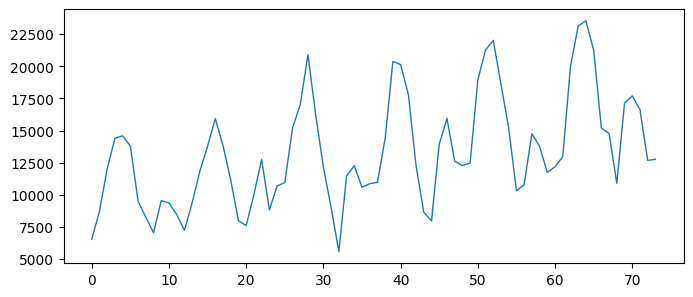

In [ ]:
h_axis = X_train.shape[0]+1
train_inv = sc.inverse_transform(train)

plt.figure(figsize=(8,3.3))
plt.plot(df[:n_train-step],lw=1.0,label='Dataset(train)')
plt.scatter(h_axis,y_true,s=75,label='True')
plt.scatter(h_axis,pred_inv[-1],c='r',marker='s',s=40,label='Prediction')
plt.scatter(h_axis,avg_cal,c='m,',marker='x',s=100,label='Average')
plt.legend()
plt.tight_layout()
plt.show

In [ ]:
X=df.index.values.reshape(-1,1)
y=df.values

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=2)
x_poly = poly_feature.fit_transform(X)
model_poly = LinearRegression
model_poly.fit(x_poly,y)

h_axis = X_train.shape[0]+1
y_poly_pred = model_poly.predict(x_poly)

train_inv = sc.inverse_transform(train)

plt.figure(figsize=(8-1,3.3))
plt.plot(df[:n_train-step],lw=1.0,label='Dataset')
plt.scatter(h_axis,y_true,s=75,label='True')
plt.scatter(h_axis,pred_inv[-1],c='r',marker='s',s=40,label='Prediction')
plt.scatter(h_axis,avg_cal,c='m,',marker='x',s=100,label='Average')
plt.plot(X,y_poly_pred,lw=1.5,color='r',label='Poly Reg')

plt.legend(loc=4)
plt.show

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

In [ ]:
x_input=[[109]]
y_poly_pred2 = model_poly.predict(poly_feature.fit_transform(x_input))
y_poly_pred2 = np.squeeze(y_poly_pred2)
print('Prediction',y_poly_pred2.round(3))

print('Actual data:',y_tune)
print('LSTM Prediction:',pred_inv[-1][-1].round(2))
print('Poly Prediciton:',y_poly_pred2.round(2))
print('Average Prediction:',avg_cal.round(2))

TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

In [ ]:
model = Sequential()
model.add(LSTM(units=32,input_shape=(step,1),activation='relu',return_sequences=True))
model.add(LSTM(units=32,activation='relu',return_sequences=True))
model.add(LSTM(units=32,activation='relu'))
mode.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

TypeError: LSTM.__init__() missing 1 required positional argument: 'units'

# GRU

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,GRU,Dense,Dropout

df = pd.read_csv('https://raw.githubusercontent.com/alfredoandere/ML/master/Project1_DOJ30/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv',index_col='Date')
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


<function matplotlib.pyplot.show(close=None, block=None)>

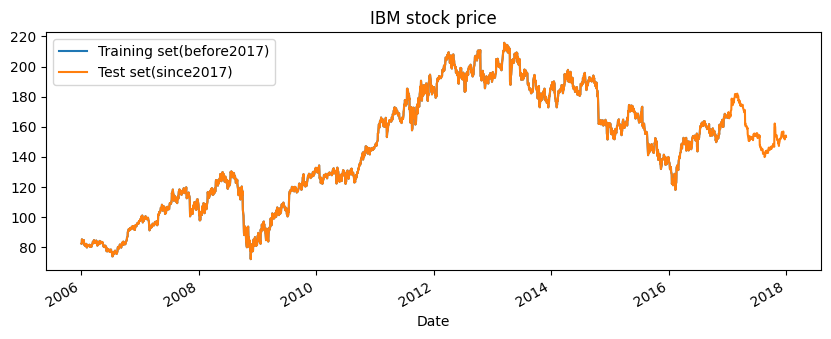

In [ ]:
df.isnull().sum()

df=df.Close
df.head()

df[:'2016'].plot(figsize=(10,3.5),legend=True)
df[:'2017'].plot(figsize=(10,3.5),legend=True)
plt.legend(['Training set(before2017)','Test set(since2017)'])
plt.title('IBM stock price')
plt.show

In [ ]:
print('Samples:',df.shape)
print('Train set:',df[:'2016'].shape)

Samples: (3020,)
Train set: (2769,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1,1)
sc=MinMaxScaler()
data_sc = sc.fit_transform(data)

In [ ]:
def convertToMetrix(data,step=1):
  X,Y=[],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

n_train = 2769

train,test = data_sc[0:n_train],data_sc[n_train:]
train.shape,test.shape

((2769, 1), (251, 1))

In [ ]:
step = 60
X_train,y_train = convertToMatrix(train,step)
X_test,y_test = convertToMatrix(test,step)

print('X_Train,Test(after conversatiob):',X_train.shape,X_test.shape)
print('y_Train,Test(after conversatiob):',y_train.shape,y_test.shape)

X_Train,Test(after conversatiob): (2709, 60, 1) (191, 60, 1)
y_Train,Test(after conversatiob): (2709, 1) (191, 1)


In [ ]:
model = Sequential()
model.add(GRU(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 60, 50)            7950      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_3 (GRU)                 (None, 40)                11040     
                                                                 
 dropout_3 (Dropout)         (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 19031 (74.34 KB)
Trainable params: 19031 (74.34 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history =  model.fit(X_train,y_train,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
85/85 [==============================] - 8s 48ms/step - loss: 0.0421
Epoch 2/50
85/85 [==============================] - 5s 55ms/step - loss: 0.0080
Epoch 3/50
85/85 [==============================] - 6s 68ms/step - loss: 0.0070
Epoch 4/50
85/85 [==============================] - 4s 52ms/step - loss: 0.0063
Epoch 5/50
85/85 [==============================] - 6s 67ms/step - loss: 0.0060
Epoch 6/50
85/85 [==============================] - 4s 49ms/step - loss: 0.0056
Epoch 7/50
85/85 [==============================] - 4s 48ms/step - loss: 0.0049
Epoch 8/50
85/85 [==============================] - 5s 63ms/step - loss: 0.0048
Epoch 9/50
85/85 [==============================] - 4s 48ms/step - loss: 0.0044
Epoch 10/50
85/85 [==============================] - 4s 50ms/step - loss: 0.0038
Epoch 11/50
85/85 [==============================] - 5s 61ms/step - loss: 0.0040
Epoch 12/50
85/85 [==============================] - 4s 49ms/step - loss: 0.0035
Epoch 13/50
85/85 [==================

<function matplotlib.pyplot.show(close=None, block=None)>

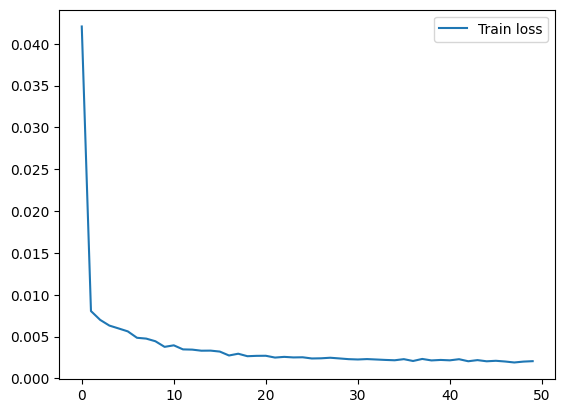

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show

In [ ]:
testPredict = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

testPredict_inv = sc.inverse_transform(testPredict)
y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv,testPredict_inv)
rmse_test=np.sqrt(mean_squared_error(y_test_inv,testPredict_inv))

print('R2 Test: {:.3f}'.format(r2_test))
print('RMSE Test: {:.3f}'.format(rmse_test))

R2 Test: 0.884
RMSE Test: 2.536


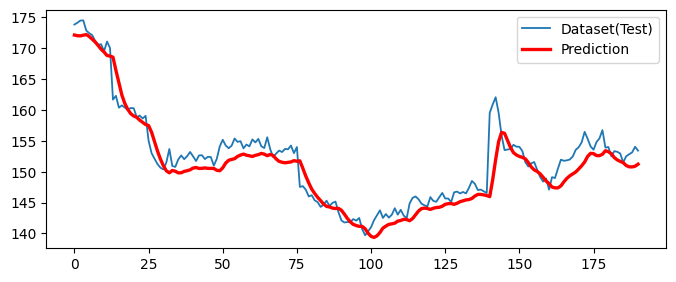

In [ ]:
plt.figure(figsize=(12-4,3.1))
plt.plot(y_test_inv,lw=1.3,label='Dataset(Test)')
plt.plot(testPredict_inv,'r',lw=2.4,label='Prediction')
plt.legend()
plt.show()

In [ ]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(step,1),activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(unit=40,activation='relu'))

ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)